# Project: Titanic - Machine Learning from Disaster

**Link Dataset:** https://www.kaggle.com/competitions/titanic

<center>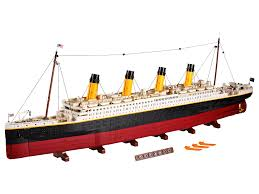</center>

In [198]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
train_df = pd.read_csv("./data/titanic/train.csv")
test_df = pd.read_csv("./data/titanic/test.csv")

In [200]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [201]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [202]:
set(train_df.columns) - set(test_df.columns)

{'Survived'}

**Notes:**
* `SibSp`: # of siblings / spouses aboard the Titanic
* `Parch`: # of parents / children aboard the Titanic
* `Ticket`: Ticket number
* `Cabin`: Cabin number

In [203]:
# Preview Data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
# Convert PassengerId into Index
train_df.set_index(train_df.PassengerId, inplace=True)

In [205]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
train_df.drop('PassengerId', axis = 1, inplace=True)

In [207]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [208]:
test_df = pd.read_csv('./data/titanic/test.csv', index_col='PassengerId')

In [209]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Feature Classification: Categorical and Numerical
* This helps us select the appropriate plots for visualization

**Which features are categorical?**
* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
* To classify the samples into sets of similar samples

**Which features are numerical?**
* Numerical Features: `discrete`, `continous` or `timeseries`
* These values change from sample to sample

In [210]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [211]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`
* Numerical: (continous)`Age`, (discrete)`Fare`
* Mix types of data: `Ticket`, `Cabin`
* Contain Error/Typo: `Name`
* Blank or Null: `Cabin` > `Age` > `Embarked`
* Various Data Type: `String`, `Int`, `Float`

According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the date type of the column is int64, which is a numerical type. We can change that with the following command.

In [212]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [213]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [214]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [215]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

def covert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
covert_cat(train_df, features)
covert_cat(test_df, features)

In [216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


##### **Distribution of Numerical feature values across the samples**

In [217]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [218]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# Exploratory Data Analysis (EDA)

## Correlating categorical features 
* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`

## Target Variable: `Survived`

In [219]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [220]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disaster. So training data suffers from data imbalance but it is not severe (adj: nghiêm trọng) which is why I will not consider techniques like sampling to tackle the imbalance

## `Sex`

In [221]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


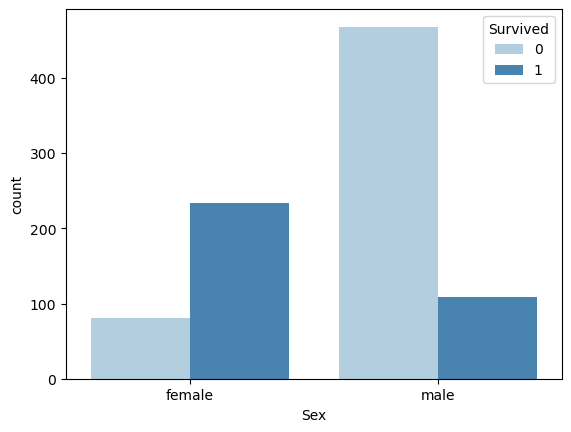

In [222]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues');

- Remaining Categorical Feature Columns

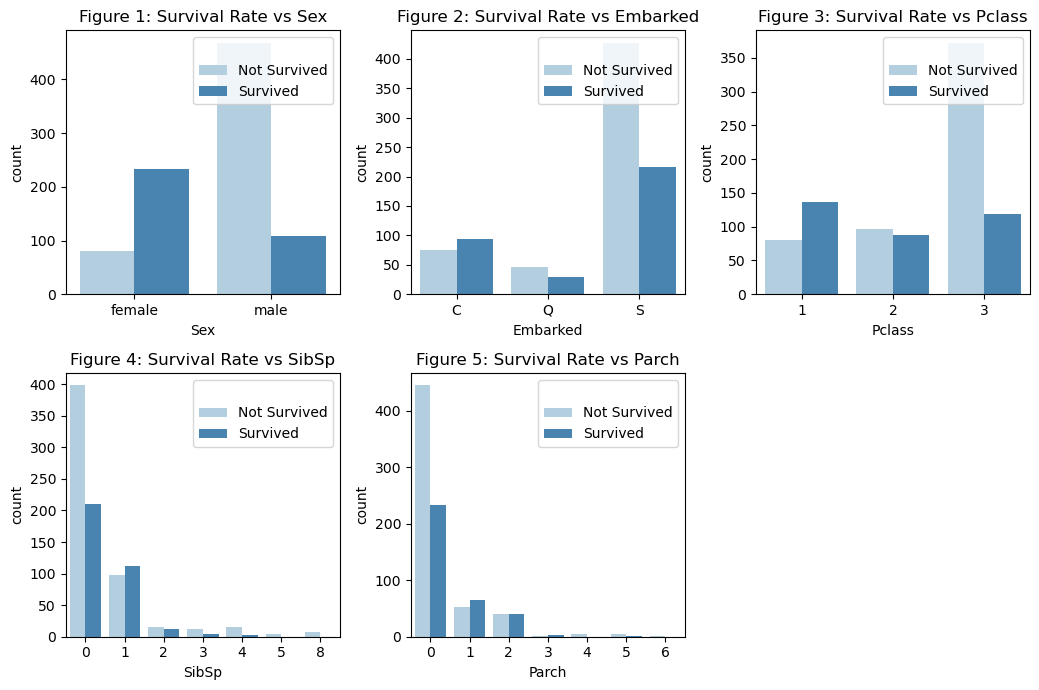

In [223]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title=' ', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()     

### Observation:

* **Survival Rate**:
    - Fig 1: Female survival rate > male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate
    - Fig 4: People going with 0 `SibSp` are mostly no survived, the number of passenger with 1-2 family members has a better chance of survival
    - Fig 5: People going with 0 `Parch` are mostly not survived

## EDA for Numerical Features
* Numerical Features: (continuous) `Age`, `Fare`

### `Age`

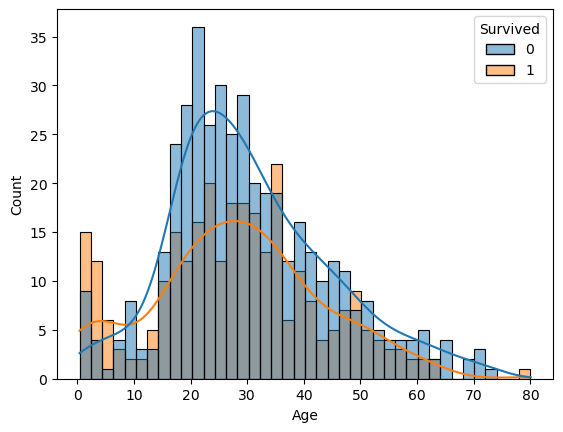

In [224]:
sns.histplot(data=train_df, x = 'Age', hue='Survived', bins = 40, kde=True);

- Majority passengers were from 18-40 ages
- Children had more chance to survive than other ages

### Fare

In [225]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

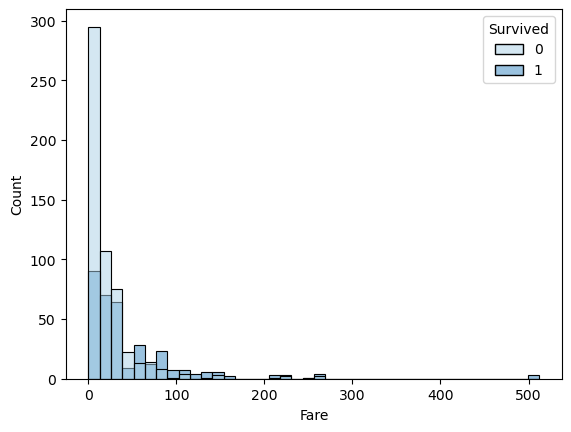

In [226]:
sns.histplot(data=train_df, x="Fare", hue="Survived", bins=40, palette="Blues");

<Axes: xlabel='Fare', ylabel='count'>

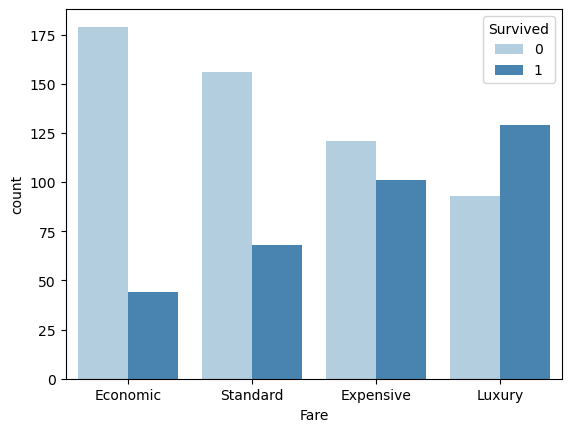

In [227]:
# To name for 0-25% quartitle, 25-50, 50-75, 75-100
fare_categories = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df["Fare"], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df["Survived"], palette="Blues")

In [228]:
train_df["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range `[0-100$]'
    - The distribution is skewed to the left `75%` of the fare paid under `$31` and a max paid fare of `$512`.
- Quartile plot:
    - Passenger with Luxury & Expensive Fare will have more chance to survive

# Feature Engineering & Data Wrangling

## Name
- Regular Expression

In [229]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [230]:
import re #Regular Expression

def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    # if p.search(name) is None:
    #     print(name)
    return p.search(name).group(1).strip()

train_df["Title"] = train_df["Name"].apply(lambda name: extract_title(name))

In [231]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [232]:
train_df[train_df["Name"].str.contains("Mrs. Martin")]["Name"]

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [233]:
test_df["Title"] = test_df["Name"].apply(lambda name: extract_title(name))

In [234]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [235]:
def group_title(title):
    if title in ["Mr", "Miss", "Mrs", "Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title: group_title(title))

In [236]:
train_df["Title"].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

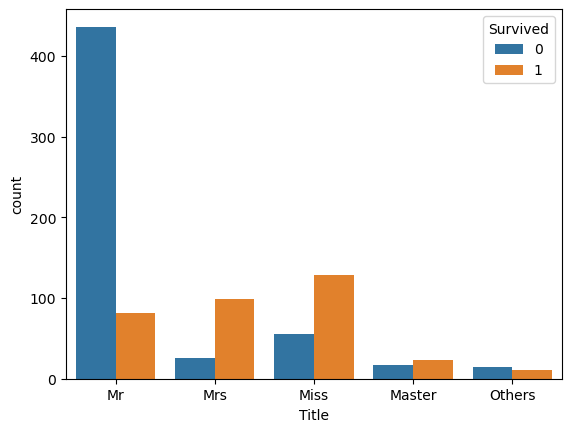

In [237]:
sns.countplot(data=train_df, x='Title', hue='Survived');

## Family
- `SibSp`, `Parch`

In [238]:
train_df["Family_Size"] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [239]:
test_df["Family_Size"] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [240]:
# (0, 1], (1, 4], (4, 6], (6, 20]
train_df["Family_Cat"] = pd.cut(train_df["Family_Size"], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])

In [241]:
test_df["Family_Cat"] = pd.cut(test_df["Family_Size"], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Small', 'Medium', 'Large'])

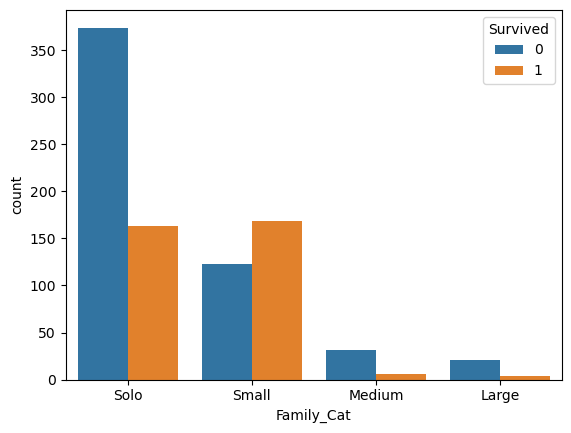

In [242]:
sns.countplot(data=train_df, x='Family_Cat', hue="Survived");

## Data Wrangling

In [243]:
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Embarked", "Title", "Family_Cat"]
feature_cols =  num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [244]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


### Filling missing values

#### Age
- Filling missing values with `median` of whole dataset

In [245]:
age_by_pclass_sex = train_df.groupby(["Sex","Pclass"],observed=True)['Age'].median()

age_by_pclass_sex

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [246]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

result = train_df.groupby(['Sex', 'Pclass'], observed=True, as_index=False)['Age'].apply(lambda x: x.fillna(x.median()))
train_df['Age'] = result.reset_index(level=0, drop=True)

In [247]:
result = test_df.groupby(['Sex', 'Pclass'], observed=True, as_index=False)['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = result.reset_index(level=0, drop=True)

In [248]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [249]:
X = train_df[feature_cols]
y = train_df['Survived']

In [250]:
X_test = test_df[feature_cols]

In [251]:
# Preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [252]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [253]:
preprocessor.fit(X)
# After this step, preprocessor already knows mean and std of X dataset

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [254]:
X = preprocessor.transform(X) # X -> X_train, X_val

In [255]:
X_test = preprocessor.transform(X_test)

In [256]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train_, y_val = train_test_split(X, y, test_size=0.2)